## Data Analysis project 

Dataset:
Lexique - context 
Cash request - actual information
Fees - actual information 

Part 1. Let's explore the data and clean it up a bit

In [1]:
import numpy as np
import pandas as pd

In [2]:
cash_request_df = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')


In [3]:
cash_request_df.shape
#23970 rows & 16 columns 
#cash_request_columns = cash_request_df.columns
#cash_request_columns
#cash_request_df.nunique()
cash_request_df.info()
#pd.isnull(cash_request_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [4]:
#deleting deleted user
cash_request_df= cash_request_df[cash_request_df['user_id']>0]


In [5]:
#Data type cleanup
cash_request_df['user_id'] = cash_request_df['user_id'].astype(int)

#cash_request_df

In [6]:
#Convert "created_at" into a cohort 
cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'])

cash_request_df['created_at_month']= cash_request_df['created_at'].dt.month
cash_request_df['created_at_year']= cash_request_df['created_at'].dt.year
cash_request_df['created_at_day']= cash_request_df['created_at'].dt.day
#Concatenate year, months into a single string column
cash_request_df['date_created_at'] = cash_request_df['created_at_year'].astype(str) + '-' + cash_request_df['created_at_month'].astype(str)+ '-' + cash_request_df['created_at_day'].astype(str)
#converting string to datetime
cash_request_df['created_at_date']=pd.to_datetime(cash_request_df['date_created_at'], format='%Y-%m-%d')


In [7]:
# Convert 'reimbursement_date' column to datetime format
#cash_request_df['reimbursement_date'] = pd.to_datetime(cash_request_df['reimbursement_date'])

# Extract year, month, and day into separate columns
cash_request_df['year_reimbursement'] = cash_request_df['created_at'].dt.year
cash_request_df['month_reimbursement'] = cash_request_df['created_at'].dt.month
cash_request_df['day_reimbursement'] = cash_request_df['created_at'].dt.day
# Concatenate year, month,olumns into a single string column
cash_request_df['full_date_str_reimbursement_date'] = cash_request_df['year_reimbursement'].astype(str) + '-' + cash_request_df['month_reimbursement'].astype(str) + '-' + cash_request_df['day_reimbursement'].astype(str)
# Convert the concatenated string column to datetime format
cash_request_df['reimbursement_date'] = pd.to_datetime(cash_request_df['full_date_str_reimbursement_date'], format='%Y-%m-%d')

#cleaning date
#cash_request_df.drop(columns=['day','month'],inplace=True)


In [8]:
#Cohort based on the first CR received by the user
first_request_dates = cash_request_df.groupby('user_id')['created_at'].min()
cohort_df = pd.DataFrame({'user_id':first_request_dates.index, 'first_request': first_request_dates.values })
cash_request_df= pd.merge(cash_request_df,cohort_df, on='user_id', how='left')


In [12]:
cash_request_df

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,created_at_month,created_at_year,created_at_day,date_created_at,created_at_date,year_reimbursement,month_reimbursement,day_reimbursement,full_date_str_reimbursement_date,first_request
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804,2019-12-11 16:47:42.405646+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12-10 19:05:21.596873
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231,2019-12-11 14:24:22.897988+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12-10 19:50:12.347780
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191,2019-12-11 09:46:59.777728+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12-10 19:13:35.825460
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761,2019-12-18 14:26:18.128407+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12-10 19:16:10.880172
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686,2020-05-07 09:21:55.320193+00,NaN,2020-05-06,NaN,...,5,2020,6,2020-5-6,2020-05-06,2020,5,6,2020-5-6,2020-05-06 09:59:38.877376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21862,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00,20064,2020-09-19 15:37:54.670099+00,NaN,2020-09-19,2020-09-22,...,9,2020,19,2020-9-19,2020-09-19,2020,9,19,2020-9-19,2020-06-23 08:44:20.738365
21863,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681,NaN,NaN,2020-10-12,2020-10-13,...,10,2020,12,2020-10-12,2020-10-12,2020,10,12,2020-10-12,2020-06-09 11:55:34.299738
21864,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122,NaN,NaN,2020-10-20,2020-10-21,...,10,2020,20,2020-10-20,2020-10-20,2020,10,20,2020-10-20,2020-10-20 07:58:04.006937
21865,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517,NaN,NaN,2020-10-10,2020-10-12,...,10,2020,10,2020-10-10,2020-10-10,2020,10,10,2020-10-10,2020-10-10 05:40:55.700422


In [13]:
#cohort creation
cash_request_df['first_request']= cash_request_df['first_request'].dt.to_period('M')
cash_request_df

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,created_at_month,created_at_year,created_at_day,date_created_at,created_at_date,year_reimbursement,month_reimbursement,day_reimbursement,full_date_str_reimbursement_date,first_request
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804,2019-12-11 16:47:42.405646+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231,2019-12-11 14:24:22.897988+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191,2019-12-11 09:46:59.777728+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761,2019-12-18 14:26:18.128407+00,NaN,2019-12-10,NaN,...,12,2019,10,2019-12-10,2019-12-10,2019,12,10,2019-12-10,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686,2020-05-07 09:21:55.320193+00,NaN,2020-05-06,NaN,...,5,2020,6,2020-5-6,2020-05-06,2020,5,6,2020-5-6,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21862,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00,20064,2020-09-19 15:37:54.670099+00,NaN,2020-09-19,2020-09-22,...,9,2020,19,2020-9-19,2020-09-19,2020,9,19,2020-9-19,2020-06
21863,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681,NaN,NaN,2020-10-12,2020-10-13,...,10,2020,12,2020-10-12,2020-10-12,2020,10,12,2020-10-12,2020-06
21864,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122,NaN,NaN,2020-10-20,2020-10-21,...,10,2020,20,2020-10-20,2020-10-20,2020,10,20,2020-10-20,2020-10
21865,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517,NaN,NaN,2020-10-10,2020-10-12,...,10,2020,10,2020-10-10,2020-10-10,2020,10,10,2020-10-10,2020-10


In [ ]:
# Extract year, month, and day into separate columns

In [15]:
#Choosing the columns to use in analysis 
selected_columns_cash = ['id','amount','status','created_at_date','reimbursement_date','user_id','recovery_status','first_request']
cash_request_ndf= cash_request_df[selected_columns_cash].copy()

In [36]:
#recovery_status cleanup
cash_request_ndf['recovery_status']= cash_request_ndf['recovery_status'].fillna('no_incident')

In [37]:
#new dataframe to use 
cash_request_ndf

,id,amount,status,created_at_date,reimbursement_date,user_id,recovery_status,first_request
0,5,100.0,rejected,2019-12-10,2019-12-10,804,no_incident,2019-12
1,70,100.0,rejected,2019-12-10,2019-12-10,231,no_incident,2019-12
2,7,100.0,rejected,2019-12-10,2019-12-10,191,no_incident,2019-12
3,10,99.0,rejected,2019-12-10,2019-12-10,761,no_incident,2019-12
4,1594,100.0,rejected,2020-05-06,2020-05-06,7686,no_incident,2020-05
...,...,...,...,...,...,...,...,...
21862,16834,100.0,money_back,2020-09-19,2020-09-19,20064,completed,2020-06
21863,20616,100.0,money_back,2020-10-12,2020-10-12,13681,no_incident,2020-06
21864,22357,100.0,money_back,2020-10-20,2020-10-20,82122,no_incident,2020-10
21865,20256,100.0,money_back,2020-10-10,2020-10-10,64517,no_incident,2020-10


In [17]:
#data explorations calculations
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#summary stats
summary_stats = cash_request_ndf.describe().reset_index()
summary_stats

,index,id,amount,created_at_date,reimbursement_date,user_id
0,count,21867.000000,21867.000000,21867,21867,21867.000000
1,mean,14280.978049,82.641240,2020-08-20 10:36:00.296337152,2020-08-20 10:36:00.296337152,32581.250789
2,min,3.000000,1.000000,2019-11-19 00:00:00,2019-11-19 00:00:00,34.000000
3,25%,7919.000000,50.000000,2020-07-14 00:00:00,2020-07-14 00:00:00,10804.000000
4,50%,14757.000000,100.000000,2020-09-05 00:00:00,2020-09-05 00:00:00,23773.000000
5,75%,21028.500000,100.000000,2020-10-14 00:00:00,2020-10-14 00:00:00,46965.000000
6,max,27010.000000,200.000000,2020-11-01 00:00:00,2020-11-01 00:00:00,103719.000000
7,std,7789.309858,26.669831,NaN,NaN,27618.565773


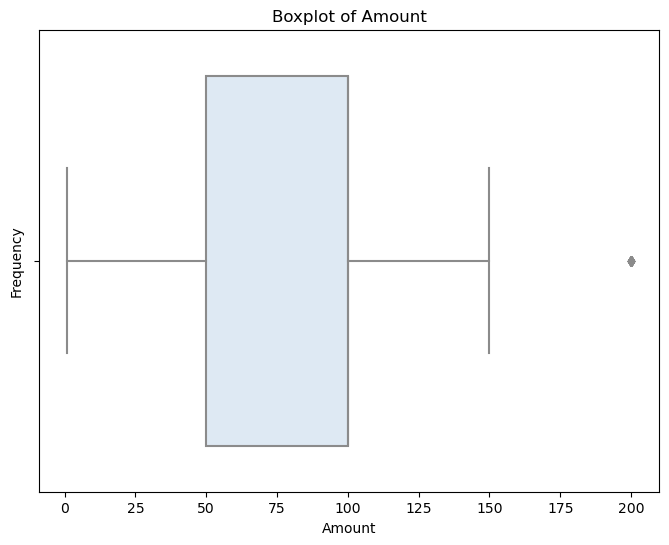

In [22]:

# Create a boxplot for 'amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=cash_request_ndf['amount'])
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

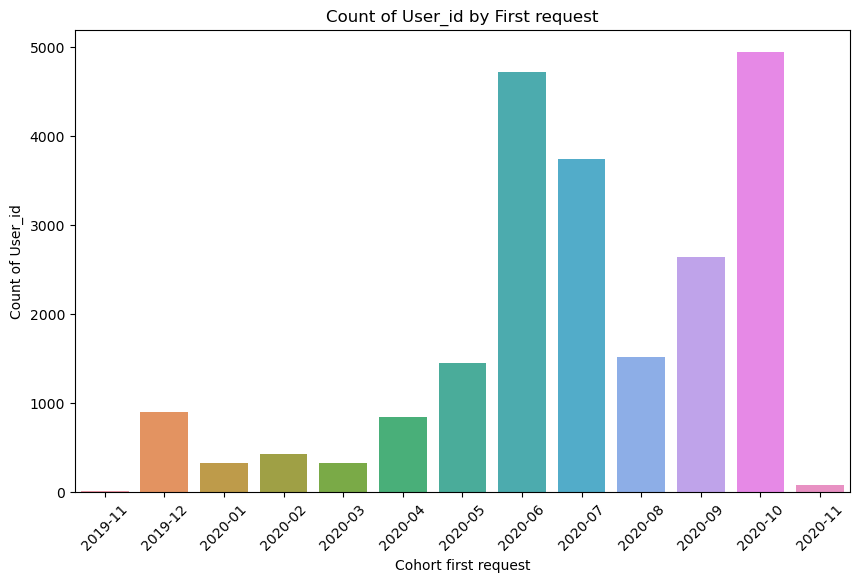

In [21]:
# Count occurrences of user_id for each cohort_month_year
cohort_counts = cash_request_ndf['user_id'].groupby(cash_request_ndf['first_request']).count().reset_index()

#set the palette 
sns.set_palette("Blues")

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='first_request', y='user_id', data=cohort_counts)
plt.title('Count of User_id by First request')
plt.xlabel('Cohort first request')
plt.ylabel('Count of User_id')
plt.xticks(rotation=45)
plt.show()

In [23]:
#metric calculation
frequency= cash_request_ndf.groupby(['first_request','user_id']).size().reset_index()
print(frequency)

      first_request  user_id  0
0           2019-11       47  8
1           2019-12       35  7
2           2019-12       52  4
3           2019-12       53  4
4           2019-12       68  1
...             ...      ... ..
10793       2020-11   103425  1
10794       2020-11   103437  1
10795       2020-11   103496  1
10796       2020-11   103503  1
10797       2020-11   103719  1

[10798 rows x 3 columns]


In [24]:
#fees exploration
fees_df =pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

In [25]:
fees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [26]:
#fees cleanup 

#rows with no cash_request_id, the cash_request_id is present in the reason column therefore it will be extracted 
fees_df['cash_request_id'].fillna(fees_df['reason'].str.extract(r'(\d+)')[0], inplace=True)


C:\Users\anama\AppData\Local\Temp\ipykernel_14436\866884938.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['11164' '11444' '11788' '12212']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fees_df['cash_request_id'].fillna(fees_df['reason'].str.extract(r'(\d+)')[0], inplace=True)


In [27]:
#converting object to int 
fees_df['id']= fees_df['id'].astype(int)
fees_df['cash_request_id'] = fees_df['cash_request_id'].astype(int)

In [31]:
fees_df.rename(columns={'id':'fee_id'}, inplace=True)

In [33]:
#Choose what columns are usefull for the analysis related to cash request 
selected_columns_fees= ['fee_id','cash_request_id','total_amount']
#fees_ndf= fees_df[selected_columns_fees].copy()
fees_ndf = fees_df[selected_columns_fees].groupby('cash_request_id').sum()
fees_ndf.reset_index()



,cash_request_id,fee_id,total_amount
0,1456,44,5.0
1,1503,132,15.0
2,1518,219,40.0
3,1554,2598,20.0
4,1556,1599,5.0
...,...,...,...
12932,27004,21175,5.0
12933,27006,21181,5.0
12934,27007,21182,5.0
12935,27009,21183,5.0


In [29]:
#EDA calculations 
summary_stats_fees= fees_ndf.describe()
print(summary_stats_fees)

                  id  total_amount
count   12937.000000  12937.000000
mean    17330.279354      8.140218
std     14367.057856      6.846411
min         2.000000      5.000000
25%      9044.000000      5.000000
50%     15453.000000      5.000000
75%     20021.000000     10.000000
max    287560.000000    175.000000


In [ ]:
#future me
#build a couple of EDA illustrations

In [34]:
fees_ndf

,fee_id,total_amount
cash_request_id,,
1456,44,5.0
1503,132,15.0
1518,219,40.0
1554,2598,20.0
1556,1599,5.0
...,...,...
27004,21175,5.0
27006,21181,5.0
27007,21182,5.0


In [38]:
#merge

merge_df = pd.merge(cash_request_ndf,fees_ndf, left_on='id', right_on='cash_request_id', how='left')

 
 #clean up NaN values 
merge_df.fillna(0, inplace=True)
merge_df['amount']= merge_df['amount'].astype(int)
merge_df['total_amount']= merge_df['total_amount'].astype(int)
merge_df.info()
merge_df.to_csv('project_dataset/merge_df.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21867 entries, 0 to 21866
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21867 non-null  int64         
 1   amount              21867 non-null  int32         
 2   status              21867 non-null  object        
 3   created_at_date     21867 non-null  datetime64[ns]
 4   reimbursement_date  21867 non-null  datetime64[ns]
 5   user_id             21867 non-null  int32         
 6   recovery_status     21867 non-null  object        
 7   first_request       21867 non-null  period[M]     
 8   fee_id              21867 non-null  float64       
 9   total_amount        21867 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(1), object(2), period[M](1)
memory usage: 1.4+ MB
